# 과제 1   
    1. 시그모이드, ReLU 외에 다른 활성화함수 찾아서 구현   
    2. 어떤 데에 응용해볼 수 있을지도 한번 생각해보기   
    3. matplot 이용해서 함수 그래프랑 미분된 그래프 그려보기

> <a href = "https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=handuelly&logNo=221824080339">딥러닝 - 활성화 함수 참조</a>   
><a href = "https://ganghee-lee.tistory.com/32">활성화 함수 종류</a>   
><a href = "https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/">How to Choose an Output Activation Function</a>   
><a href = "https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253">Very Useful information about activation function</a>   

<b>활성화 함수와 관련한 몇 가지 용어들</b>   
1. Back-propagation   
    Chaing rule에 의해서 기울기를 역으로 계산하면서 오차에 대한 weight 값의 영향력에 비례해서 이를 수정한다.   
2. Vanishing Gradient Problem   
    딥 러닝에서 학습을 위해 Back-propagation을 계산하는 과정에서 신경망이 깊어질 때 누적으로 곱해진 값들이 0으로 수렴하게 되어 가중치 영향력을 비교하기가 힘들어지는 현상   
3. <a href="https://brunch.co.kr/@kdh7575070/27">Dying ReLU</a>   
    ReLU는 음수값을 0으로 사용하는 데 propagtaion 과정에서 이런 특성 때문에 노드 값이 죽어버리는 현상   
### 활성화 함수의 종류   
* Sigmoid Function   
    시그모이드 함수는 음수 값을 0에 가깝게 표현하기 때문에 입력 값이 최종 레이어에서 미치는 영향이 적어지는  x의 절대값이 커질수록 미분 값이 소실될 가능성이 큰 단점이 있다.   
    $ sigmoid(x) = {1 \over 1 + e^{-x}} \\
    {d \over dx} sigmoid(x) = sigmoid(x)(1-sigmoid(x))$   
* Tanh Function   
    Sigmoid Function을 개량한 함수로 중심점을 0으로 옮겨 최적화 과정이 느려지는 문제를 해결했다. 하지만 Vanishing Gradient Problem은 아직 남아있다.   
    $ tanh(x) = 2\sigma (2x) - 1\\
    tanh(x) = {e^x - e^{-x} \over {e^x + e^{-x}}} \\
    tanh'(x) = 1 - tanh^2(x) $   
* ReLU   
    $ f(x) = max(0, x) $   
* Leaky ReLU   
    Dying ReLU를 해결하기 위한 함수. 0을 피하기 위해 매우 작은수 s를 곱한다.   
    $ f(x) = max(sx, x) $   
* PReLU   
    Leaky ReLU와 거의 유사하지만 작은 수 $s$가 아닌 새로운 파라미터 $\alpha$를 추가해서 계산한다.   
    $f(x) = max(\alpha x, x)$   
* ELU   
    출력 값이 거의 zero-centerd에 가까우며 일반적인 ReLU와 다르게 exp 함수를 계산하는 비용이 발생한다.   
    $
    f(x) = x \qquad if \qquad x>0 \\
    f(x) = \alpha (e^x - 1) \qquad if \qquad x<= 0 
    $   
* Maxout    
    $ f(x) = max(w_1^Tx + b_1, w_2^Tx+b_2) $   

In [31]:
import numpy as np

def Tanh(x): #Hyperbolic Tangent
    return (np.exp(x) - np.exp(-x)) / (np.exp(x)+(np.exp(-x)))

def LReLU(x, a = 0.01):
    return np.maximum(x*a, x)

def PReLU(x, a):
    return np.maximum(x*a, x)

def ELU(x, a):
    return (x>0)*x + (x<=0)*(a*(np.exp(x)-1))

#### 응용의 관점에서 생각해본다면..?   
Think about applications of activation function.   
1. <b>실생활에서의 활성화 함수를 쓰는 곳이 있을까?</b>   
    위의 활성화 함수를 사용하는 것은 아니지만 저역필터(low pass filter)나 고역필터(high pass filter)같은 경우 특정 출력 전압만을 내보낸다는 점에서 활성화 함수와 비슷하다고 할 수 있을 듯.   
2. <b>딥러닝에서 활성화 함수를 응용의 관점에서 생각한다면?</b>   
    비선형의 모델을 만드는데에 사용되는 것(?)   
    어떤 것을 의미하는지 잘 모르겠다.   

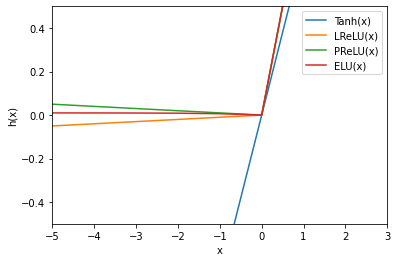

In [50]:
import matplotlib.pyplot as pl
#graph of activation functions 
pl.xlabel('x')
pl.ylabel('h(x)')
x = np.arange(-5, 5)

pl.plot(x, Tanh(x), label="Tanh(x)")
pl.plot(x, LReLU(x), label="LReLU(x)")
pl.plot(x, PReLU(x, -0.01), label="PReLU(x)")
pl.plot(x, ELU(x, -0.01), label="ELU(x)")
pl.axis([-5, 3, -0.5, 0.5])
pl.legend()
pl.show()

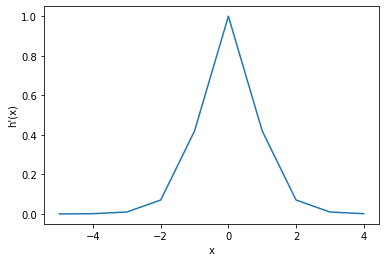

In [52]:
def gradient(f, x):
    #미분 함수
    h = 0.000001
    return (f(x+h) - f(x))/h

pl.xlabel('x')
pl.ylabel("h'(x)")
x = np.arange(-5, 5)
y = gradient(Tanh, x)
pl.plot(x, y)
pl.show()


# Chapter 4 - 신경망 학습 
---

### 학습
: 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 흭득하는 것

### 손실 함수
: 


